## AtmoBuilder / Atmo Tutorial

[Prerequisites and Installation](#Prerequisites-and-Installation)
[Background Science and Equations](#Background-Science-and-Equations)
[The Basics: Initialize AtmoBuilder](#The-Basics:-Initialize-the-AtmoBuilder-class)
[The Basics: Atmo Object](#The-Basics:-Atmo-Class)
[The Basics: SED Types](#The-Basics:-SED-Types)
[The Basics: Simple Operations](#The-Basics:-Simple-Operations)
[Regressions: Two Parameters](#Regressions:-Two-Parameters)

### Prerequisites and Installation

### Background Science and Equations

$\phi_b^{obs}(\lambda)= \frac{S^{atm}(\lambda)S_b^{sys}(\lambda){\lambda^{-1}}}{\int_0^{\infty}S^{atm}(\lambda)S_b^{sys}(\lambda) {\lambda^{-1}}d\lambda}$

$S^{atm}(\lambda) = \prod_{k=1}^5 e^{-t_k \tau_k^{std}(\lambda,X)} = e^{-\sum_{k=1}^{5} t_k \tau_k^{std}(\lambda, X)}$ 

### The Basics: Initialize AtmoBuilder

Importing the AtmoBuilder class:

In [1]:
from AtmoBuilder import AtmoBuilder

% matplotlib inline

Initializing the class:

In [2]:
ab = AtmoBuilder()

Found 16 MODTRAN files:
Pachon_MODTRAN.10.7sc
Pachon_MODTRAN.11.7sc
Pachon_MODTRAN.12.7sc
Pachon_MODTRAN.13.7sc
Pachon_MODTRAN.14.7sc
Pachon_MODTRAN.15.7sc
Pachon_MODTRAN.16.7sc
Pachon_MODTRAN.17.7sc
Pachon_MODTRAN.18.7sc
Pachon_MODTRAN.19.7sc
Pachon_MODTRAN.20.7sc
Pachon_MODTRAN.21.7sc
Pachon_MODTRAN.22.7sc
Pachon_MODTRAN.23.7sc
Pachon_MODTRAN.24.7sc
Pachon_MODTRAN.25.7sc
MODTRAN files have been read.

Read filter data from LSST software stack.
Filters: ['u', 'g', 'r', 'i', 'z', 'y4']
Read hardware data from LSST software stack.


When initialized AtmoBuilder will output the code above to notify you that it has found and read MODTRAN data, and that it has found filter and hardware data from the LSST software stack. 

Retrieving MODTRAN data:

In [3]:
# List of read airmasses
ab.airmasses

['1.000',
 '1.100',
 '1.200',
 '1.300',
 '1.400',
 '1.500',
 '1.600',
 '1.700',
 '1.800',
 '1.900',
 '2.000',
 '2.100',
 '2.200',
 '2.300',
 '2.400',
 '2.500']

In [4]:
# Standard transmission profile keyed to airmass and component
ab.transDict[1.2]['Rayleigh']

array([ 0.    ,  0.3524,  0.3551, ...,  0.9949,  0.9949,  0.9949])

Plotting the filter and hardware response curves (hardware includes filters):

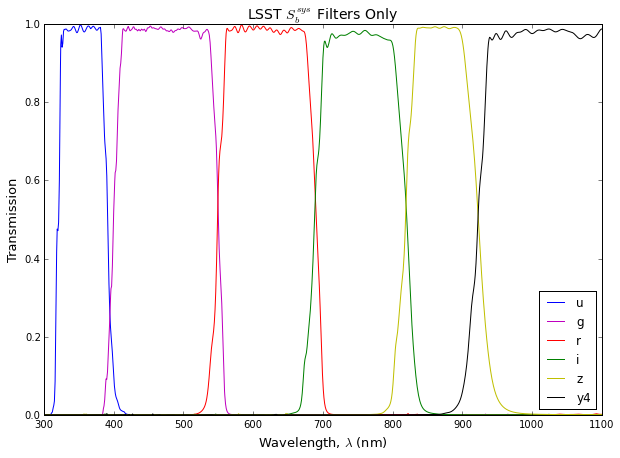

In [5]:
ab.filterPlot()

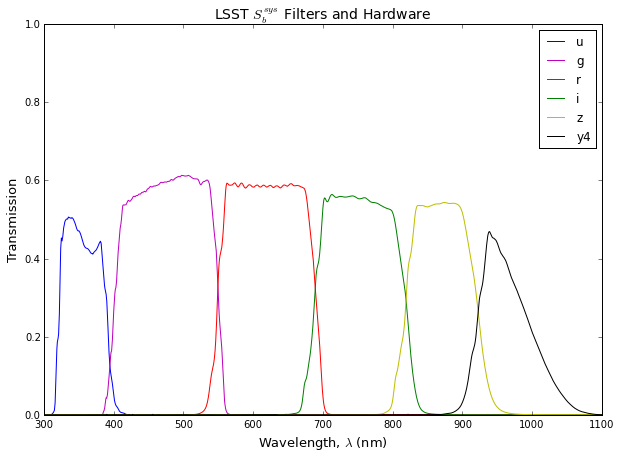

In [6]:
ab.hardwarePlot()

### The Basics: Atmo Class

AtmoBuilder utilizes an independent atmo object which keeps track of several useful elements. Let's start by creating two atmospheres:

In [8]:
atmo = ab.buildAtmo([1.0,1.0,1.2,1.0,1.4,1.7],1.2)
atmo_std = ab.buildAtmo([1.0,1.0,1.0,1.0,1.0,1.7],1.2)

The line of code above has two important keyword parameters:
    - P: parameter array containing 6 values, one for each of the atmospheric extinction components
    - X: airmass

Retrieving atmo attributes:

In [9]:
# Parameters and airmass
atmo.P, atmo.X

([1.0, 1.0, 1.2, 1.0, 1.4, 1.7], 1.2)

In [10]:
# Total transmission [array]
atmo.sb

array([ 0.        ,  0.00273939,  0.00379805, ...,  0.82669093,
        0.81941384,  0.82239957])

In [11]:
# Individual component transmission profiles [component-keyed dictionary]
atmo.sbDict

{'Aerosol': array([ 0.59238412,  0.59290044,  0.59341549, ...,  0.8668148 ,
         0.86687114,  0.86692744]),
 'H2O': array([ 0.    ,  1.    ,  1.    , ...,  0.9586,  0.9501,  0.9535]),
 'O2': array([ 0.,  1.,  1., ...,  1.,  1.,  1.]),
 'O3': array([ 0.        ,  0.01311102,  0.018024  , ...,  1.        ,
         1.        ,  1.        ]),
 'Rayleigh': array([ 0.    ,  0.3524,  0.3551, ...,  0.9949,  0.9949,  0.9949])}

AtmoBuilder has a lot of various plotting functions including one for atmospheres. The following function will take an atmo object and plot its transmission profile:

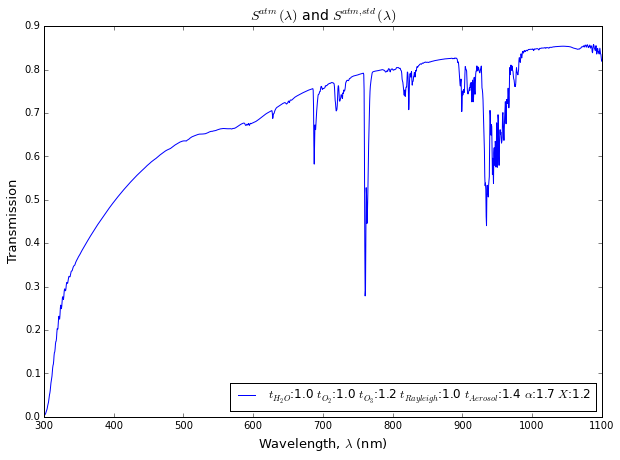

In [12]:
ab.transPlot(atmo)

AtmoBuilder can also plot the individual components:

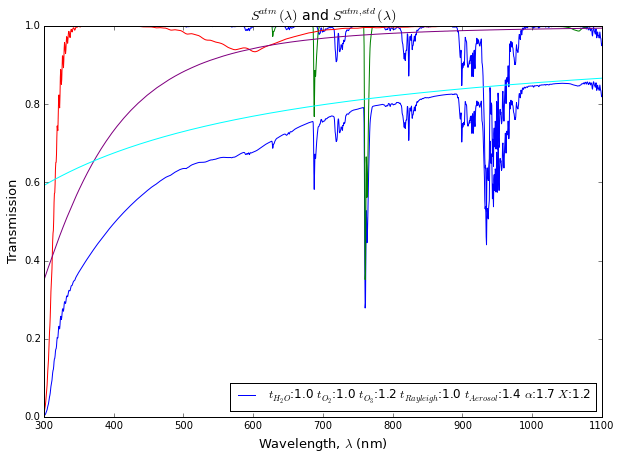

In [13]:
ab.transPlot(atmo, includeComponents=True)

Want to compare the atmosphere to another atmosphere?

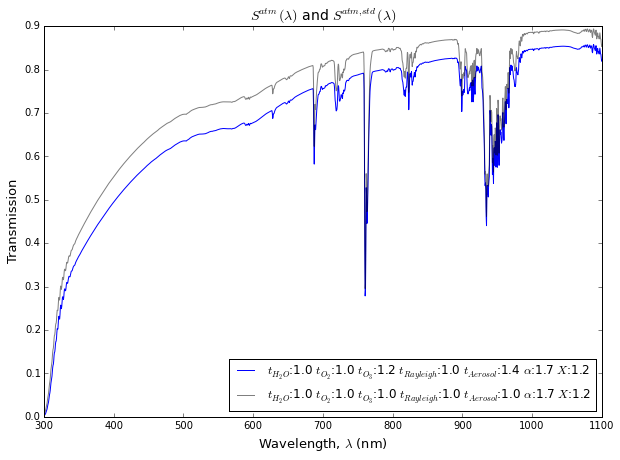

In [13]:
ab.transPlot(atmo, atmo2=atmo_std)

Of course, keeping track of a standard atmosphere like the one we created can become laborious. To solve this, internally in AtmoBuilder there are class constants which define the parameters and airmass for a standard atmosphere. For all major functionality you need not worry about keeping track of the the standard atmosphere. For example:

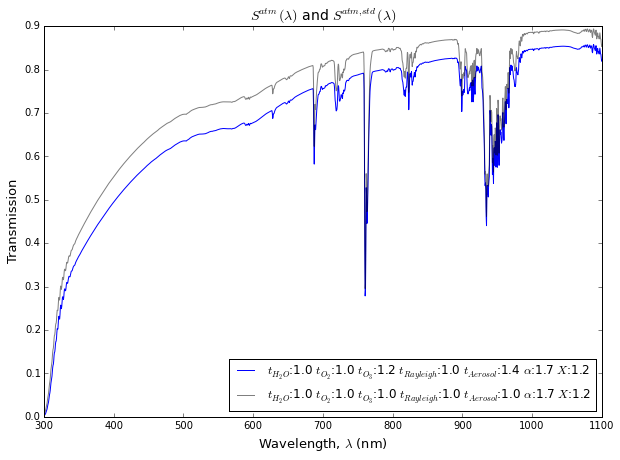

In [14]:
ab.transPlot(atmo,includeStdAtmo=True)

### The Basics: SED Types

In order to run regressions and to use many of the basic operations and functions in AtmoBuilder we need SED data to be read in. This is not done when the class is initialized because it can take a fair amount of time depending on how many SEDs you want to read in.

By default AtmoBuilder uses six SED types:
    - Kurucz Main Sequence Stars (read from LSST's SED library)
    - White Dwarf Stars (read from LSST's SED library)
    - Galaxies (generated at different redshifts from LSST's SED library)
    - MLT Dwarf Stars (read from LSST's SED library)
    - Quasars (generated at different redshifts from AtmoBuilder repository)
    - Supernovae (generated at different redshifts from AtmoBuilder repository)

Reading in Kurucz MS stars:

In [59]:
ab.readKurucz()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/


You can call similar functions for each of the six SED types to read them. Or if you want to use all of the available SED types (or a large subset) you can call the following (this will take a little bit of time):

In [60]:
ab.readAll()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/
# Read 849 white dwarfs from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/wDs/
# Read 74 mlt stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/mlt/
# Generated 2520 galaxies at redshifts between 0.000000 and 3.000000
# Generated 76 quasars at redshifts between 0.000000 and 7.500000
# Generated 39 sn's at redshifts between 0.000000 and 1.200000 on days ['0', '20', '40']


If you want to run some simple operations it may be helpful to retrieve the SED data you read in. With AtmoBuilder it is remarkably easy to do so as it is all stored as class attributes. Lets retrieve some quasar data:

In [61]:
qso = ab.quasars
qso_z = ab.quasarRedshifts

### The Basics: Simple Operations

Once you have some SED data read in you can use them to calculate magnitudes, delta magnitudes, and so on... 

Lets combine hardware data and an atmosphere object to get the combined throughput:

In [62]:
throughput = ab.combineThroughputs(atmo)
throughput_std = ab.combineThroughputs(atmo_std)

Using the throughput we can calculate the magnitudes of stars we read in (defaults to using Kurucz MS SEDs)

In [63]:
mags = ab.mags(throughput)
mags_std = ab.mags(throughput_std)

Or we can calculate the magnitudes of other SEDs:

In [64]:
qso_mags = ab.mags(throughput, seds=qso, sedkeylist=qso_z)
qso_mags_std = ab.mags(throughput_std, seds=qso, sedkeylist=qso_z)

Suppose we want to see the change magnitudes between two atmospheres for a single SED type:

In [65]:
dmags = ab.dmags(mags, mags_std)
qso_dmags = ab.dmags(qso_mags, qso_mags_std)

### Regressions: Two Parameters

Running two diminensional regressions: